<a href="https://colab.research.google.com/github/faisalaldwaish/Analysis-of-stock-data/blob/main/Analysis_of_stock_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Analysis of Stock Data
This notebook analyzes stock data over a 5-year period. The goal is to identify key trends, patterns, and insights
that can guide investment strategies. The dataset is sourced from Kaggle:
[All Stocks 5yr Dataset](https://www.kaggle.com/datasets/rohitjain454/all-stocks-5yr).

## Objectives
1. Understand the dataset structure.
2. Perform exploratory data analysis (EDA).
3. Visualize trends and patterns in the data.
4. Summarize findings and provide actionable insights.


-----------------------------------

Libraries used


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

----------------------------------

Here we read this file

In [43]:
df=pd.read_csv('all_stocks_5yr.csv')

Display data

In [113]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


How many rows and columns are in the data?

In [45]:
df.shape

(619040, 7)

In [46]:
df.tail()

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [50]:
df[(df['high']==78.27) & (df['Name']=='ZTS')]['volume']

,volume
619035,2982259


Statistical summary of the data set

In [16]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


----------------

Information about the data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


----------------------------

Are there empty values?

In [18]:
df.isnull().sum()

,0
date,0
open,11
high,8
low,8
close,0
volume,0
Name,0


----


I calculated the average of the values ​​so that they are not empty

In [19]:
df['open'].fillna(df['open'].mean(), inplace=True)
df['high'].fillna(df['high'].mean(), inplace=True)
df['low'].fillna(df['low'].mean(), inplace=True)

<ipython-input-19-62ee5f70de58>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['open'].fillna(df['open'].mean(), inplace=True)
<ipython-input-19-62ee5f70de58>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

------------

Here I cleaned the data


In [20]:
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0


What is the highest closing price of all stocks?

In [21]:
df['close'].max()

2049.0

---------------------------------------------------

What is the lowest closing price of all stocks?

In [22]:
df['close'].min()

1.59

---------------------------------------------------

What is the average closing price?

In [23]:
df['close'].mean()

83.04376276476482

In [118]:
df['high'].max()

2067.99

In [120]:
df[df['high']==2067.99]['Name']

,Name
441193,PCLN


--------------------------------------------------

Which company achieved the highest share price of 1498?

In [24]:
df[df['high']==1498.0]['Name']

,Name
47642,AMZN


---------------------
Sum of the highest prices for each company.

In [34]:
df.groupby('Name')['high'].sum()

,high
Name,
A,62446.4739
AAL,49045.0423
AAP,168477.2362
AAPL,138428.4580
ABBV,77395.9335
...,...
XYL,52580.7312
YUM,95718.1484
ZBH,133982.5966


-----------------------------
Closing price of AAL on February 14, 2013.

In [35]:
df[(df['Name'] == 'AAL') & (df['date'] == '2013-02-14')]['close']

,close
4,13.99


In [36]:
df[(df['Name'] == 'BLL') & (df['date'] == '2013-12-13')]['close']

,close
87228,24.955


-------------------------------
Displays the trading volume for the company "EOG" on September 3, 2014.

In [37]:
df[(df['Name'] == 'EOG') & (df['date'] == '2014-09-03')]['volume']

,volume
197313,1479234


-----------------------------------------------------------


Which company has the best performance?

In [104]:

best_company = df.groupby('Name')['close'].mean().idxmax()
The_best_closing_price_for_a_company = df.groupby('Name')['close'].mean().max()


best_company, The_best_closing_price_for_a_company


('PCLN', 1312.8735377283558)

---------------------------------------------------

What are the total closing prices of the best performing company?

In [107]:

df[df['Name'] == best_company]['close'].sum()

1652907.784

---------------------------

Which company has the bad  performance?

In [65]:
bad_company = df.groupby('Name')['close'].mean().idxmin()
The_bad_closing_price_for_a_company = df.groupby('Name')['close'].mean().min()


bad_company, The_best_closing_price_for_a_company

('AMD', 5.6018625893566325)

----------------------------------------------

What are the total closing prices of the bad performing company?

In [108]:
df[df['Name'] == bad_company]['close'].sum()

7052.745000000001

What are the ten companies with the highest stock prices?

In [25]:
df1=df.groupby('Name')['high'].max() .head(10)

In [26]:
df1

,high
Name,
A,75.00
AAL,59.08
AAP,201.24
AAPL,180.10
ABBV,125.86
ABC,120.68
ABT,64.60
ACN,162.60
ADBE,204.45


Text(0, 0.5, 'Highest High Price')

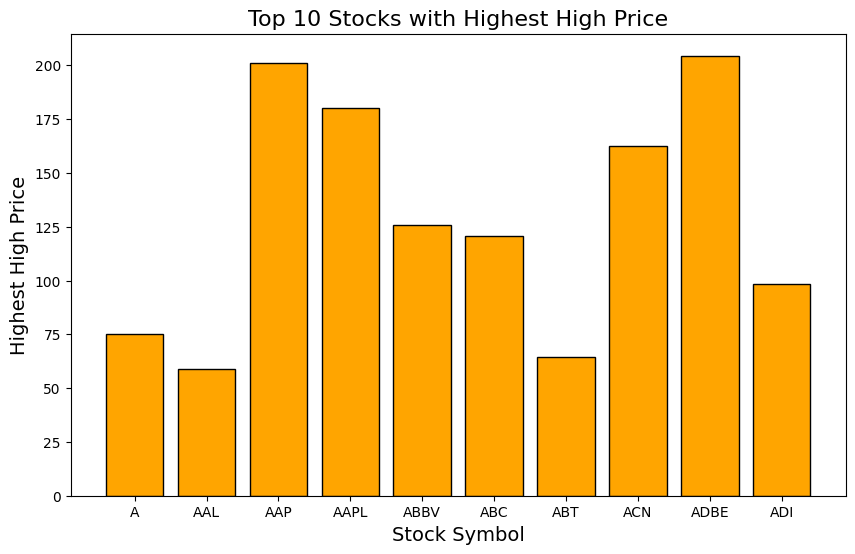

In [110]:
plt.figure(figsize=(10, 6))
plt.bar(df1.index, df1.values, color='orange', edgecolor='black')
plt.title('Top 10 Stocks with Highest High Price', fontsize=16)
plt.xlabel('Stock Symbol', fontsize=14)
plt.ylabel('Highest High Price', fontsize=14)

--------------------------------------------------------

**The top 5 companies with the highest closing stock price via an interactive line chart.**

In [33]:
selected_stocks = df['Name'].unique()[:5]
filtered_data = df[df['Name'].isin(selected_stocks)]
fig = px.line(
    filtered_data,
    x='date',
    y='high',
    color='Name',
    title='High Prices of First 5 Stocks Over Time',
    labels={'date': 'Date', 'high': 'High Price', 'Name': 'Stock Name'},
    template='plotly'
)

# Show the plot
fig.show()

--------------------------------------------


**The change in AAL stock prices over time.**

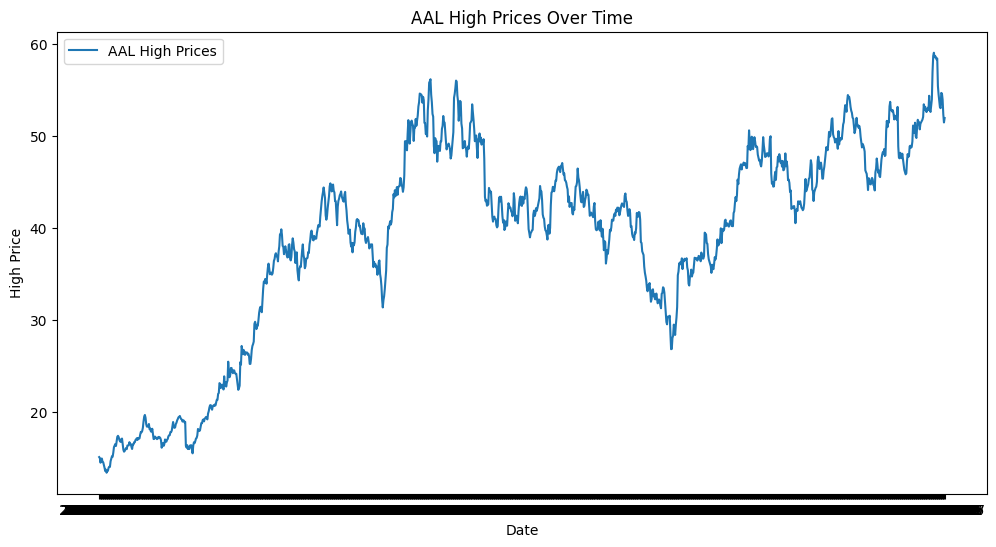

In [100]:
aal_data = df[df['Name'] == 'AAL']
plt.figure(figsize=(12, 6))
plt.plot(aal_data['date'], aal_data['high'], label='AAL High Prices')
plt.title('AAL High Prices Over Time')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.legend()
plt.show()


------------------------------------------------------------

**average prices for each day for all stocks and plots the change in these prices over time in a linear manner.**

In [117]:
avarege_close_per_date = df.groupby('date')['close'].mean().reset_index()

fig_avg_close = px.line(
    avarege_close_per_date,
    x='date',
    y='close',
    title='Average Closing Price of All Stocks Over Time',
    labels={'date': 'Date', 'close': 'Average Closing Price'},
)
fig_avg_close.show()

-------------------------------

In [97]:
comparison_data = df[(df['Name'] == best_company) | (df['Name'] == bad_company)]

fig = px.line(
    comparison_data,
    x='date',
    y='close',
    color='Name',
    title="Comparison of Closing Prices Between Best and Worst Performing Companies",
    labels={"close": "Closing Price", "date": "Date", "Name": "Company"}
)

# Updating layout for better readability
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Closing Price",
    legend_title="Company",
    # template="plotly_black"
)

# Display the interactive chart
fig.show()

---------

**Top 5 Stocks with Highest Close Price**



In [109]:
df2=df.groupby('Name')['close'].max().head(5)

In [29]:
fig=plt.figure()
fig = px.line(df2, x=df2.index, y=df2.values, title='Top 5 Stocks with Highest Close Price')
fig.show()



<Figure size 640x480 with 0 Axes>

---------------------------------------------------------------

**Here, it calculates the correlation matrix between the numerical columns in the data and displays it as a heatmap to illustrate the strength of the relationship between the different variables.**

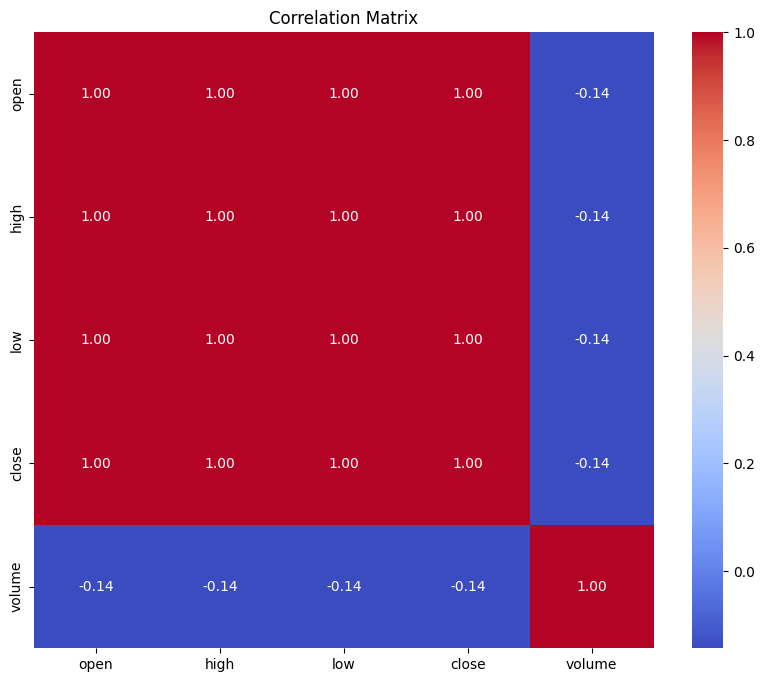

In [30]:
correlation = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

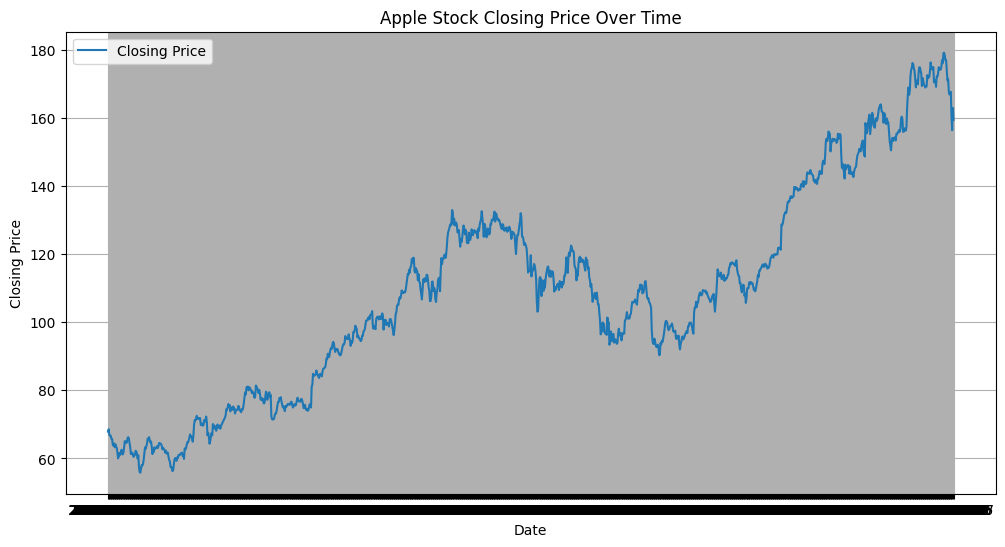

In [122]:
aapl_stock=df[df['Name'] == 'AAPL']

plt.figure(figsize=(12, 6))
plt.plot(aapl_stock['date'], aapl_stock['close'], label='Closing Price')
plt.title('Apple Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()